In [92]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

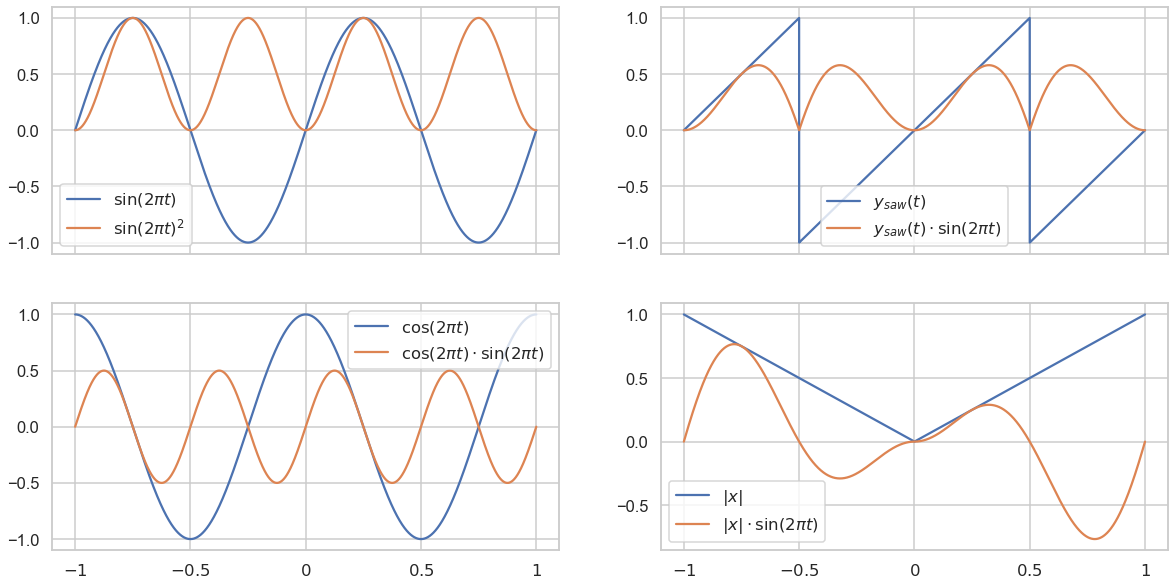

In [137]:
N = 10000
x = np.linspace(-1, 1, N)
y = lambda x: np.sin(x)*np.sin(x)

fig, ax = plt.subplots(2,2,figsize=(20,10))

# sin, sin^2
ax[0,0].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[0,0].set_xticklabels([])
ax[0,0].plot(x, np.sin(2*np.pi*x), label=r'$\sin(2\pi t)$')
ax[0,0].plot(x, np.sin(2*np.pi*x)*np.sin(2*np.pi*x), label=r'$\sin(2\pi t)^2$')
ax[0,0].legend()

ax[0,1].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[0,1].set_xticklabels([])
saw = lambda x: 2 * (x - np.floor(1/2 + x))
ax[0,1].plot(x, saw(x), label=r'$y_{saw}(t)$')
ax[0,1].plot(x, np.sin(2*np.pi*x)*saw(x), label=r'$y_{saw}(t) \cdot \sin(2\pi t)$')
ax[0,1].legend()

ax[1,0].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[1,0].set_xticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])
ax[1,0].plot(x, np.cos(2*np.pi*x), label=r'$\cos(2\pi t)$')
ax[1,0].plot(x, np.sin(2*np.pi*x)*np.cos(2*np.pi*x), label=r'$\cos(2\pi t) \cdot \sin(2\pi t)$')
ax[1,0].legend()

ax[1,1].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[1,1].set_xticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])
saw = lambda x: np.abs(x)
ax[1,1].plot(x, saw(x), label=r'$|x|$')
ax[1,1].plot(x, np.sin(2*np.pi*x)*saw(x), label=r'$|x| \cdot \sin(2\pi t)$')
ax[1,1].legend()

fig.savefig('../figs/sounddesign/math/sin_product.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

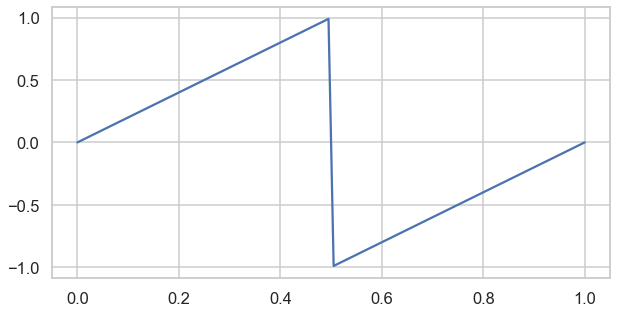

In [11]:
def sawtooth(f, n):
    t = np.linspace(0, 1, n)
    amp = 2 * (f*t - np.floor(1/2 + f*t))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, amp)
    #ax.set_aspect(1.0)
sawtooth(1, 100)

0.499995000000005
0.24999749999999923
0.16666500000000076
0.12499874999999966
0.09999900000000032
0.08333249999999923
0.07142785714285774
0.06249937500000029


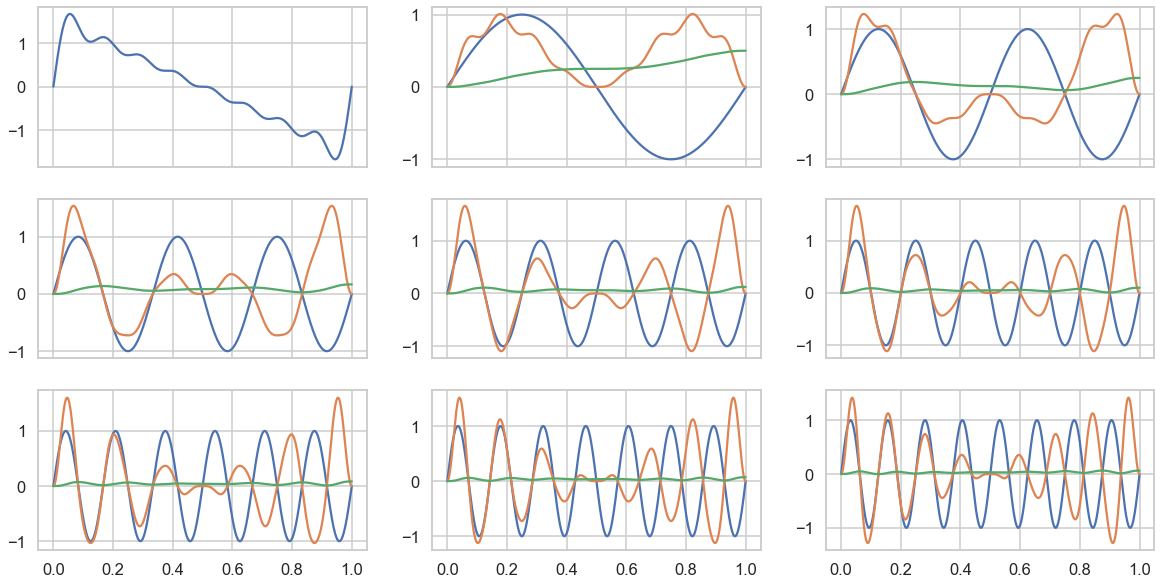

In [136]:
N = 100000
n = 8
def sawtooth_ap(t, n):
    result = 0
    for k in range(1, n+1, 1):
        result += np.sin(TWO_PI * k * t) / k
    return result
        
t = np.linspace(0, 1, N)
amp = sawtooth_ap(t, n)
k = int((n+1)**0.5)
fig, ax = plt.subplots(k,k,figsize=(20,10))
ax[0,0].plot(t, amp)

index = 0
for i in range(k):
    for j in range(k):
        if i < k-1:
            ax[i,j].set_xticklabels([])
        if i != 0 or j != 0:
            index += 1
            ax[i,j].plot(t, np.sin(TWO_PI * index * t))
            y=amp*np.sin(TWO_PI * index * t)
            ax[i,j].plot(t, y)
            ax[i,j].plot(t, cumtrapz(y=y, x=t, initial=0))
            print(sum(amp*np.sin(TWO_PI * index * t) / N))
            #ax[i,j].axhline(y=sum(amp*np.sin(TWO_PI * index * t) / index / N), linestyle='--')
fig.savefig('../figs/sounddesign/math/saw_analysis.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)


In [114]:
1/19

0.05263157894736842

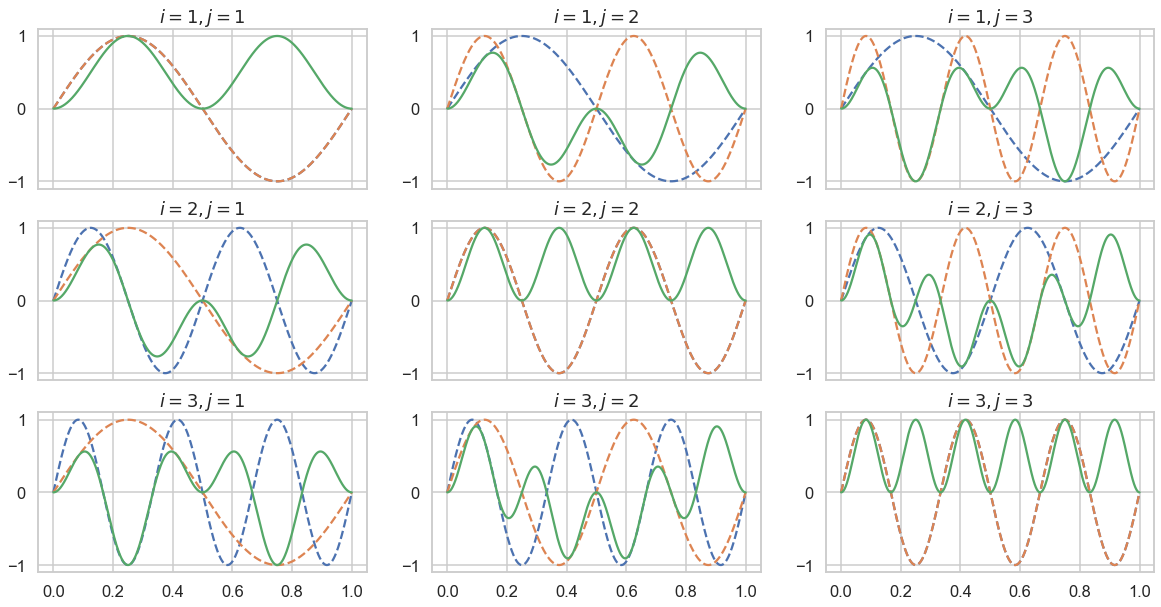

In [158]:
N = 100000
n = 8
        
t = np.linspace(0, 1, N)
k = int((n+1)**0.5)
fig, ax = plt.subplots(k,k,figsize=(20,10))

index = 0
for i in range(1,k+1):
    for j in range(1,k+1):
        index += 1
        alpha = 0
        beta = 0
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (i * t - alpha)), label=f'$i={{{i}}}$', linestyle='--')
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (j * t - beta)), label=f'$j={{{j}}}$', linestyle='--')
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha)))
        if i < k:
            ax[i-1,j-1].set_xticklabels([])
        #ax[i-1,j-1].plot(t, cumtrapz(y=np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha)), x=t, initial=0))
        #ax[i-1,j-1].legend()
        ax[i-1,j-1].set_title(f'$i={{{i}}}, j={{{j}}}$')
        #print(sum(np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha))/N))
            #ax[i,j].axhline(y=sum(amp*np.sin(TWO_PI * index * t) / index / N), linestyle='--')
fig.savefig('../figs/sounddesign/math/sine_perp.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

In [74]:
def dft(x, y, k):
    N = len(x)
    omega = 2*np.pi
    result = 0
    for i in range(N):
        result += y(x[i]) * np.sin(k*omega*i/N)
    return result/N
    

In [14]:
dft(x, y, 4)

-0.00026695431680664864

In [76]:
k

3.0